## 📈 Trend Uncertainty Estimation: Rationale and Methodology

This notebook cell below evaluates how the **standard error (SE) of a linear trend estimate** (specifically the slope) varies as a function of the **number of acquisitions per year**, the **duration of the time series**, and the **per-measurement accuracy**.

### 🔍 Purpose
In remote sensing missions like NASA STV, estimating long-term surface elevation trends (e.g., at grounding lines or glacier fronts) requires understanding how observation frequency and accuracy influence the **confidence in linear trend detection**. This is especially critical for detecting small elevation changes (e.g., mm/yr to cm/yr scale) in dynamic cryospheric environments.

### 📊 What the Code Does
- It simulates time series data of 1 and 3 years in length, with varying numbers of acquisitions per year (from 1 to 365).
- For each scenario, it:
  - Generates evenly spaced time steps across the observation period.
  - Computes the **sum of squared deviations from the mean time**, which determines how well the slope can be estimated.
  - Calculates the **standard error of the slope** using the formula:  
 $
SE_{\text{slope}} = \frac{\sigma}{\sqrt{\sum (t_i - \bar{t})^2}}
$
    where $\sigma $ is the measurement uncertainty (e.g., 7m, 1m, or 0.1m).
- Plots the resulting standard error of slope as a function of acquisitions per year.

### 📏 Accuracy Scenarios
- The plot includes curves for:
  - **7 m accuracy**, representative of current TanDEM-X-style SAR DEMs.
  - **1 m accuracy**, achievable with data fusion or improved radar/lidar.
  - **0.1 m accuracy**, representative of photon-counting lidar (e.g., ICESat-2).
- Both **1-year** and **3-year** observation windows are analyzed.

### 📌 Additional Features
- Vertical dashed lines mark specific acquisition frequencies (e.g., 365 for daily, 33 for ~11-day repeat, 12 for monthly, 4 for seasonal).
- A **logarithmic y-axis** is used to capture the wide range in uncertainty.

This analysis provides mission designers and analysts with a clear understanding of how **increasing temporal sampling** and **improving measurement precision** can dramatically reduce trend uncertainty, especially over longer time baselines.

/var/folders/41/k8bvybfs4q10t5r84zjs9kyh0000gq/T/ipykernel_52400/1539023494.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  se_slope_all_1yr_7m = [sigma_7m / np.sqrt(ssd) for ssd in sum_sq_dev_all_1]
/var/folders/41/k8bvybfs4q10t5r84zjs9kyh0000gq/T/ipykernel_52400/1539023494.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  se_slope_all_1yr_1m = [sigma_1m / np.sqrt(ssd) for ssd in sum_sq_dev_all_1]
/var/folders/41/k8bvybfs4q10t5r84zjs9kyh0000gq/T/ipykernel_52400/1539023494.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  se_slope_all_1yr_0_1m = [sigma_0_1m / np.sqrt(ssd) for ssd in sum_sq_dev_all_1]


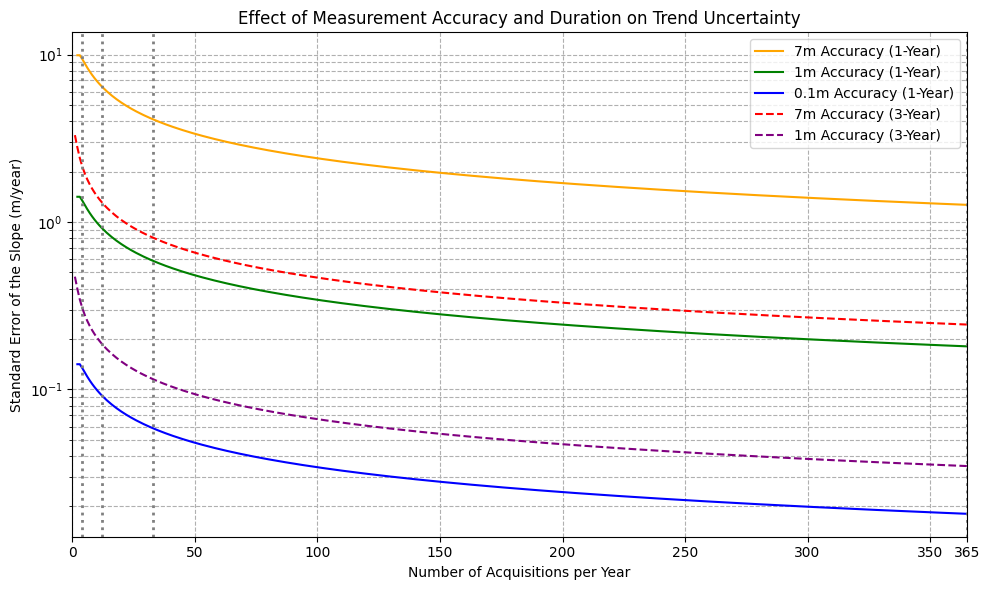

In [15]:
# NASA STV Tools - Jupyter Notebook Content

import numpy as np
import matplotlib.pyplot as plt

# --- Trend Uncertainty Estimation (1-year and 3-year cases) ---

# Parameters
sigma_7m = 7
sigma_1m = 1
sigma_0_1m = 0.1
years_1 = 1
years_3 = 3
acquisitions_per_year = np.arange(1, 366)

# Time arrays
N_total_1 = acquisitions_per_year * years_1
t_all_1 = [np.linspace(0, years_1, n) for n in N_total_1]
sum_sq_dev_all_1 = [np.sum((t - np.mean(t))**2) for t in t_all_1]

N_total_3 = acquisitions_per_year * years_3
t_all_3 = [np.linspace(0, years_3, n) for n in N_total_3]
sum_sq_dev_all_3 = [np.sum((t - np.mean(t))**2) for t in t_all_3]

# Compute SE of slope
se_slope_all_1yr_7m = [sigma_7m / np.sqrt(ssd) for ssd in sum_sq_dev_all_1]
se_slope_all_1yr_1m = [sigma_1m / np.sqrt(ssd) for ssd in sum_sq_dev_all_1]
se_slope_all_1yr_0_1m = [sigma_0_1m / np.sqrt(ssd) for ssd in sum_sq_dev_all_1]
se_slope_all_3yr_7m = [sigma_7m / np.sqrt(ssd) for ssd in sum_sq_dev_all_3]
se_slope_all_3yr_1m = [sigma_1m / np.sqrt(ssd) for ssd in sum_sq_dev_all_3]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(acquisitions_per_year, se_slope_all_1yr_7m, label='7m Accuracy (1-Year)', color='orange')
plt.plot(acquisitions_per_year, se_slope_all_1yr_1m, label='1m Accuracy (1-Year)', color='green')
plt.plot(acquisitions_per_year, se_slope_all_1yr_0_1m, label='0.1m Accuracy (1-Year)', color='blue')
plt.plot(acquisitions_per_year, se_slope_all_3yr_7m, label='7m Accuracy (3-Year)', color='red', linestyle='--')
plt.plot(acquisitions_per_year, se_slope_all_3yr_1m, label='1m Accuracy (3-Year)', color='purple', linestyle='--')

# Add vertical lines (no labels)
for xval in [365, 33, 12, 4]:
    plt.axvline(x=xval, color='gray', linestyle=':', linewidth=2)

# Ensure 365 on axis
plt.xticks(list(plt.xticks()[0]) + [365])

plt.xlabel('Number of Acquisitions per Year')
plt.ylabel('Standard Error of the Slope (m/year)')
plt.title('Effect of Measurement Accuracy and Duration on Trend Uncertainty')
plt.grid(True, which="both", ls="--")
plt.xlim(0, 365)
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()




## 📊 2D Visualization of Slope Uncertainty: Impact of Measurement Frequency and Accuracy

This cell generates a 2D contour plot that illustrates how the **standard error of a linear trend slope** depends on:

- The **number of acquisitions** collected over a time period (X-axis)
- The **per-observation measurement uncertainty** in meters (Y-axis)

### 📐 Methodology

For each combination of measurement uncertainty and number of acquisitions:
- A synthetic time series of evenly spaced acquisitions is simulated.
- The **sum of squared deviations** from the mean acquisition time is computed, which governs the denominator in the slope uncertainty formula.
- The **standard error of the slope** is then calculated using:
  
  $
  SE_{\text{slope}} = \frac{\sigma}{\sqrt{\sum_{i}(t_i - \bar{t})^2}}
  $
  where:
  - $ \sigma $ is the per-measurement uncertainty (0.1–15 meters)
  - $ t_i $ are the number of acquisition acquired for each pixel in a certain time interval

### 🎨 Plot Features

- A **color map** (viridis) represents the magnitude of the slope uncertainty in m/year.
- **White contours** highlight slope errors from 0.05 to 0.5 m/year (at 0.1 m/year increments).
- **Black contours** cover broader uncertainties from 0.6 to 3.0 m/year.
- **Vertical dashed red lines** indicate 6-month intervals (every 182 days), allowing visual alignment with common satellite revisit cycles or seasonal patterns.
- The colorbar shows slope uncertainty values, and the entire field is bounded between 0.05 and 1.5 m/year for visual clarity.

### ✅ Use Cases

This diagnostic visualization supports the design of satellite altimetry missions by quantifying how:
- Increased **sampling frequency** (e.g., daily vs. monthly acquisitions),
- Improved **observation accuracy**, and
- Longer **time spans**

jointly reduce uncertainty in estimating long-term elevation trends — critical for detecting subtle changes in ice sheets, permafrost, or sea-level dynamics.

/var/folders/41/k8bvybfs4q10t5r84zjs9kyh0000gq/T/ipykernel_52400/896929280.py:10: RuntimeWarning: divide by zero encountered in divide
  SE_slope = Y / np.sqrt(SSD)


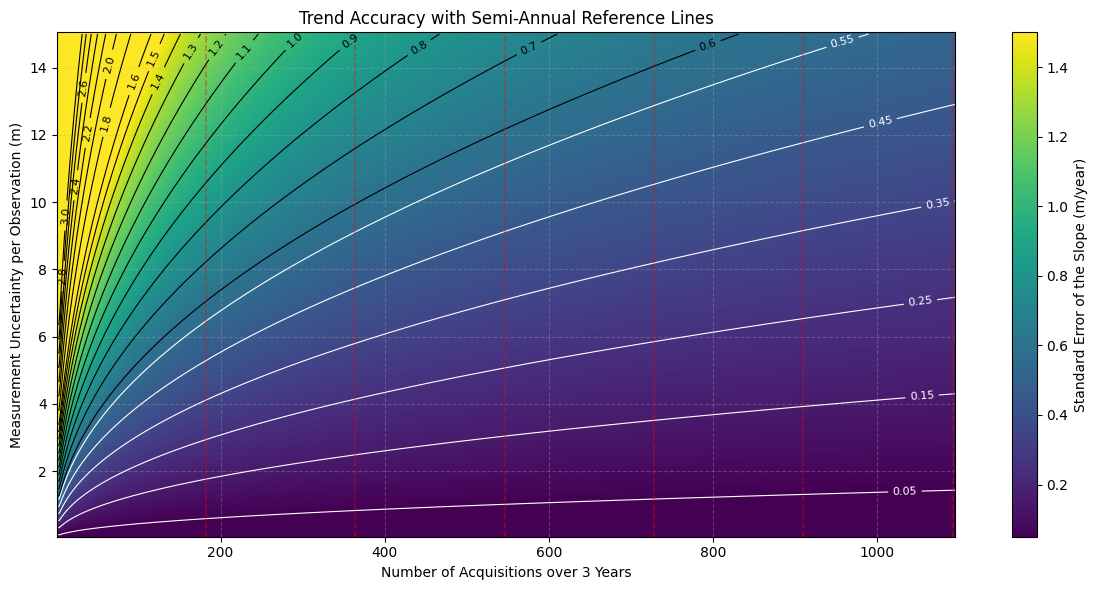

In [16]:
# --- 2D Plot: SE of slope as function of number of acquisitions and accuracy ---

x_acquisitions = np.arange(1, 1096)
y_uncertainty = np.linspace(0.1, 15, 150)
X, Y = np.meshgrid(x_acquisitions, y_uncertainty)

t_grid = [np.linspace(0, years_3, int(n)) for n in x_acquisitions]
sum_sq_dev_grid = np.array([np.sum((t - np.mean(t))**2) for t in t_grid])
SSD = np.tile(sum_sq_dev_grid, (len(y_uncertainty), 1))
SE_slope = Y / np.sqrt(SSD)

# Contour levels
coarse_levels_white = np.arange(0.05, 0.6, 0.1)
coarse_levels_black = np.arange(0.6, 1.6, 0.1)
coarse_levels_mid_black = np.arange(1.6, 3.1, 0.2)
all_black_levels = np.concatenate((coarse_levels_black, coarse_levels_mid_black))

# Plot
plt.figure(figsize=(12, 6))
c = plt.pcolormesh(X, Y, SE_slope, shading='auto', cmap='viridis', vmin=0.05, vmax=1.5)

# Contours
contours_white = plt.contour(X, Y, SE_slope, levels=coarse_levels_white, colors='white', linewidths=0.8)
plt.clabel(contours_white, inline=True, fontsize=8, fmt="%.2f")
contours_black = plt.contour(X, Y, SE_slope, levels=all_black_levels, colors='black', linewidths=0.8)
plt.clabel(contours_black, inline=True, fontsize=8, fmt="%.1f")

# Add 6-month interval vertical lines (every 182 days)
for x in range(182, 1096, 182):
    plt.axvline(x=x, color='red', linestyle='--', alpha=0.4, linewidth=1.2)

plt.colorbar(c, label='Standard Error of the Slope (m/year)')
plt.xlabel('Number of Acquisitions over 3 Years')
plt.ylabel('Measurement Uncertainty per Observation (m)')
plt.title('Trend Accuracy with Semi-Annual Reference Lines')
plt.grid(True, which="both", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


## 🛰️ Line Plot of Miss Probability vs. Deformation Area for Different Beam Spacings

This code generates a line plot illustrating how the **probability of missing a surface elevation change event** depends on the **size of the event** and the **spacing between satellite altimeter beams**. It evaluates and compares this probability for three beam spacing scenarios: **30 km**, **10 km**, and **5 km**.

### 🔍 Objective

To quantify how often satellite altimetry (e.g., ICESat-2-like systems) might miss localized deformation events — such as those from glacier movement or subsidence — based on how frequently beams intersect a given area and how large the deformation is.

### 🧮 Assumptions and Methodology

- Deformation events are assumed to be **square-shaped**, with width = $ \sqrt{\text{area}} $.
- The **satellite footprint width** is fixed at 17 meters (0.017 km).
- The **observation frame** represents a TanDEM-X (TDX) style swath of 40 km width.
- For each beam spacing (30, 10, and 5 km):
  - The number of beams crossing the frame is estimated as:
   $
    N = \left\lfloor \frac{\text{Frame Width}}{\text{Beam Spacing}} \right\rfloor + 1
    $
  - The **total detection width** is calculated as the number of beams times the effective detection band (event width + beam width).
  - The **probability of missing the event** is computed as:
    $
    P_{\text{miss}} = 1 - \frac{\text{Total Detection Width}}{\text{Frame Width}}
    $
  - This is converted to a percentage and plotted as a function of event area.

### 📈 Plot Features

- X-axis: Deformation event area (1 to 400 km²)
- Y-axis: Probability of missing the event (1% to 100%)
- Colored lines represent each beam spacing:
  - **30 km** (sparse sampling) in navy
  - **10 km** (moderate sampling) in dark orange
  - **5 km** (dense sampling) in forest green
- A log-scale-like effect is achieved visually by zooming in on small-to-moderate event sizes, where detection probability varies most rapidly.

### ✅ Insights

- Small deformation events (< 50 km²) have a high likelihood of being missed when beam spacing is large (e.g., 30 km).
- Reducing beam spacing greatly increases detection probability, even for localized signals.
- This analysis helps define spatial sampling requirements for future altimetry missions focused on detecting transient or localized surface changes.

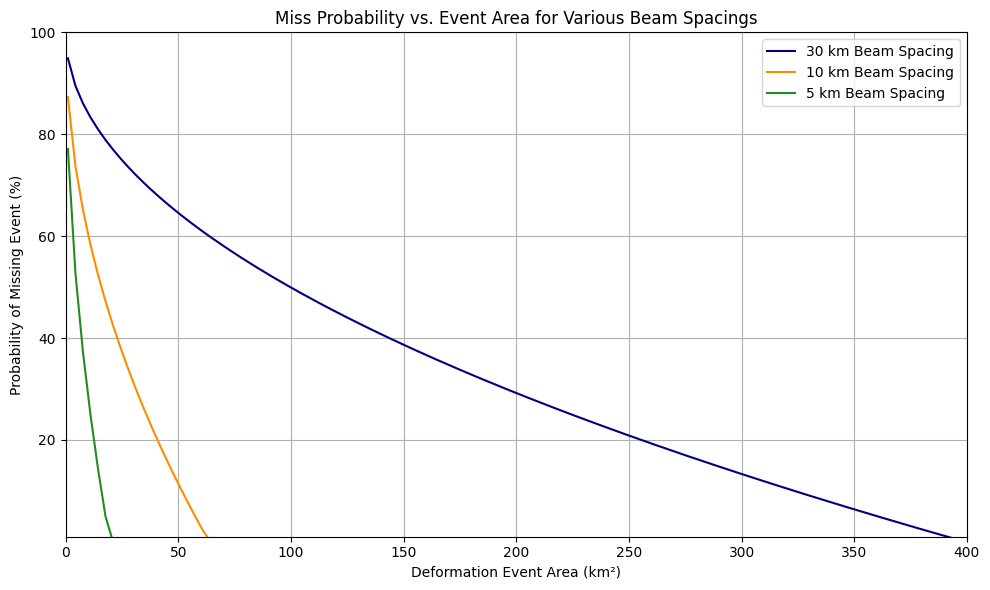

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# --- Probability of Missing Deformation Events ---

# Constants
beam_width = 0.017  # km (ICESat-2 beam footprint width)
frame_width = 40    # km (TDX frame width)
event_areas_large = np.linspace(1, 1000, 300)  # Event areas from 1 to 1000 km²
event_widths_large = np.sqrt(event_areas_large)  # Assuming square-shaped deformation

# Define the beam spacings to compare
spacings = [30, 10, 5]  # in kilometers
colors = ['navy', 'darkorange', 'forestgreen']
labels = ['30 km Beam Spacing', '10 km Beam Spacing', '5 km Beam Spacing']

# Create plot
plt.figure(figsize=(10, 6))

# Loop through each beam spacing to calculate and plot miss probability
for spacing, color, label in zip(spacings, colors, labels):
    num_tracks = np.floor(frame_width / spacing) + 1
    detection_band = event_widths_large + beam_width
    total_detection_width = num_tracks * detection_band
    P_miss = 1 - (total_detection_width / frame_width)
    P_miss_percent = np.clip(P_miss * 100, 0, 100)
    plt.plot(event_areas_large, P_miss_percent, label=label, color=color)

# Final plot formatting
plt.xlabel('Deformation Event Area (km²)')
plt.ylabel('Probability of Missing Event (%)')
plt.title('Miss Probability vs. Event Area for Various Beam Spacings')
plt.grid(True)
plt.ylim(1, 100)
plt.xlim(0, 400)
plt.legend()
plt.tight_layout()
plt.show()

## 🛰️ Probability of Missing a Deformation Event: 2D Sensitivity Analysis

This cell generates a 2D visualization of the **probability that an altimetry system (e.g. ICESat-2)** will fail to detect a deformation event as a function of two key parameters:

- **Altimeter Beam Spacing** (X-axis): ranging from 1 km to 40 km
- **Surface elevation change Event Area** (Y-axis): ranging from 0.5 km² to 40 km²

### 📐 Assumptions & Methodology

- Deformation events are assumed to be **square-shaped**, with width computed as $ \sqrt{\text{area}} $).
- Each satellite track is treated as having a fixed **footprint width of 17 meters**.
- A fixed **observation frame of 40 km** is used, simulating a typical TanDEM-X scene.
- A deformation event is considered "detected" if it intersects **any part** of an altimeter beam.
- The total **detectable swath** is calculated by summing the effective detection bands of all beams intersecting the frame.
- The **miss probability** is defined as the fraction of the frame not covered by any detection swath.

$$
P_{\text{miss}} = 1 - \frac{\text{Total Detection Width}}{\text{Frame Width}}
$$

This probability is then expressed as a percentage for visualization.

### 🌈 Plot Description

- A **color map** (`viridis`) shows the percentage chance of missing a deformation event for each combination of beam spacing and event area.
- **White isolines** (contours every 5%) are added for enhanced interpretability.
- The isolines are generated using a **Gaussian-smoothed version** of the probability surface (`sigma=20`) to improve visual clarity and remove pixelation artifacts.

### ✅ Insights

- Small deformation events (e.g., < 5 km²) are likely to be missed if beam spacing exceeds ~10 km.
- Dense sampling (e.g., < 5 km spacing) dramatically improves detection probability across all event sizes.
- This tool can support mission planning and sampling strategy design by quantifying observational gaps under different configurations.

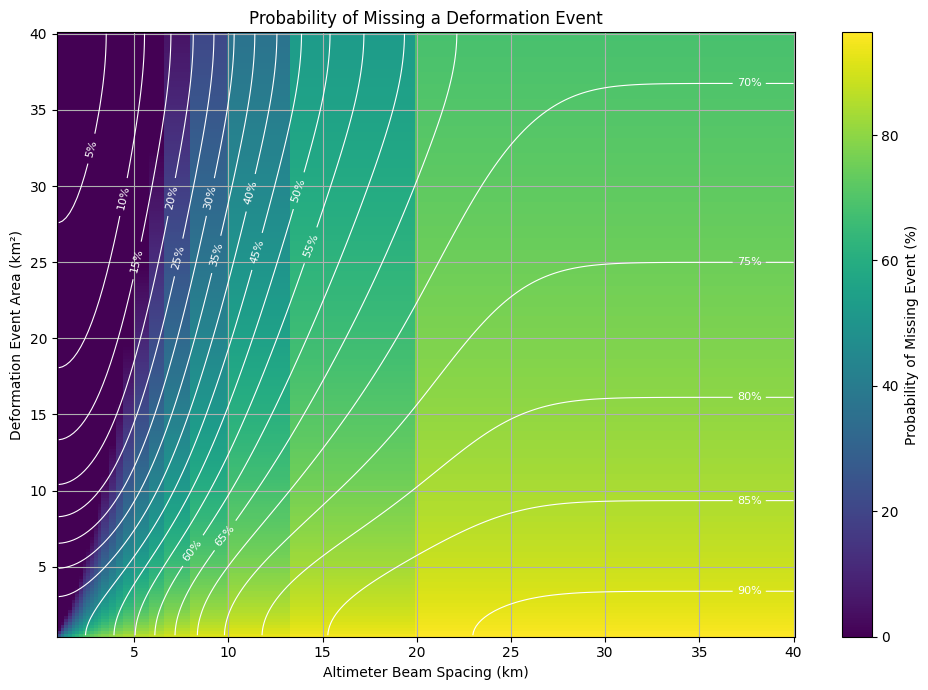

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Define the range for altimeter beam spacing (km) and deformation event area (km²)
beam_spacings = np.linspace(1, 40, 200)  # X-axis: 1 to 40 km
event_areas = np.linspace(0.5, 40, 200)  # Y-axis: 0.5 to 40 km²

# Create meshgrid for plotting
X, Y = np.meshgrid(beam_spacings, event_areas)

# Assume deformation events are square: side length = sqrt(area)
event_widths = np.sqrt(Y)

# Define constants
beam_width = 0.017  # km (17 meters)
frame_width = 40    # km

# Calculate number of tracks per frame
num_tracks = np.floor(frame_width / X) + 1

# Effective detection width per track
detection_band_per_track = event_widths + beam_width

# Total detection width
total_detection_width = num_tracks * detection_band_per_track

# Probability of missing the deformation event
P_miss = 1 - (total_detection_width / frame_width)
P_miss = np.clip(P_miss, 0, 1)
P_miss_percent = P_miss * 100  # Convert to percentage

# Apply Gaussian smoothing to the probability field
P_miss_percent_smoother = gaussian_filter(P_miss_percent, sigma=20)

# Plotting
plt.figure(figsize=(10, 7))
c = plt.pcolormesh(X, Y, P_miss_percent, shading='auto', cmap='viridis')
contours = plt.contour(X, Y, P_miss_percent_smoother, levels=np.arange(0, 105, 5), colors='white', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8, fmt='%1.0f%%')

# Labels and layout
plt.colorbar(c, label='Probability of Missing Event (%)')
plt.xlabel('Altimeter Beam Spacing (km)')
plt.ylabel('Deformation Event Area (km²)')
plt.title('Probability of Missing a Deformation Event')
plt.grid(True)
plt.tight_layout()
plt.show()